In [21]:
import tweepy
from textblob import TextBlob
import jsonpickle
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
auth.secure = True
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
searchQuery = 'pfizer'
retweet_filter='-filter:retweets'

q=searchQuery+retweet_filter
tweetsPerQry = 100
fName = 'tweets.txt'
sinceId = None

In [8]:
max_id = -1
maxTweets = 1000

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        tweets = []
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry, tweet_mode='extended')

                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        since_id=sinceId, tweet_mode='extended')
            else:
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1), tweet_mode='extended')
                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1),
                                        since_id=sinceId, tweet_mode='extended')

            if not new_tweets:
                print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(str(tweet.full_text.replace('\n','').encode("utf-8"))+"\n")

            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
                
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break
                
print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 995 tweets
Downloaded 1095 tweets
Downloaded 1095 tweets, Saved to tweets.txt


In [22]:
import re

def clean(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@[A-Za-z0–9]+', '', tweet) 
    return tweet

def read_tweets(file_name):
    with open(file_name, 'r') as f:
        tweets = [clean(line.strip()) for line in f]
    f.close()
    return tweets

In [27]:
tweets = read_tweets(fName)
print(tweets[0])
print(TextBlob(tweets[2]).sentiment)

b'From The Economist Espresso: New York closes schools; Pfizer\xe2\x80\x99s vaccine looks even better 
Sentiment(polarity=0.0, subjectivity=0.0)


In [26]:
print(tweets)

["b'From The Economist Espresso: New York closes schools; Pfizer\\xe2\\x80\\x99s vaccine looks even better ", "b'_BO 87   You took this long to figure out such a vile response? Congratulations.'", "b'The press release by Pfizer on its vaccine candidate BNT162b2 which has shown 95\\xe2\\x84\\x85 efficiency against Coronavirus infection as claimed by the company...", "b'Pfizer says its coronavirus vaccine is safe and 95% effective and that it will seek regulatory review within days ", "b'321  Nonsense.  Pfizer vaccine was developed outside of Warp Speed (Pfizer only had a manufacturing contract on ANY vaccine). Moderna vaccine was developed with 30 billion capital raised through stock float. The US merely invested $460 million.  Get your facts right!'", "b'when talking abt the covid 19 vaccine i accidentally said philza instead of pfizer'", 'b\'\\xe2\\x96\\xaa VACCINE DISTRIBUTIONPfizer and BioNTech\\\'s vaccine may be ready for emergency use "within weeks"VACCINE COVID19 DISTRIBUTION ',

In [12]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [13]:
import numpy as np

tweet_polarity = np.zeros(len(tweets))
tweet_subjectivity = np.zeros(len(tweets))

for idx, tweet in enumerate(tweets):
    tweet_polarity[idx] = polarity(tweet)
    tweet_subjectivity[idx] = subjectivity(tweet)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


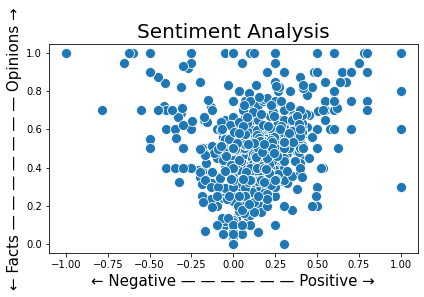

In [15]:
sns.scatterplot(tweet_polarity, # X-axis
                tweet_subjectivity,  # Y-axis
                s=100);


plt.title("Sentiment Analysis", fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.tight_layout()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


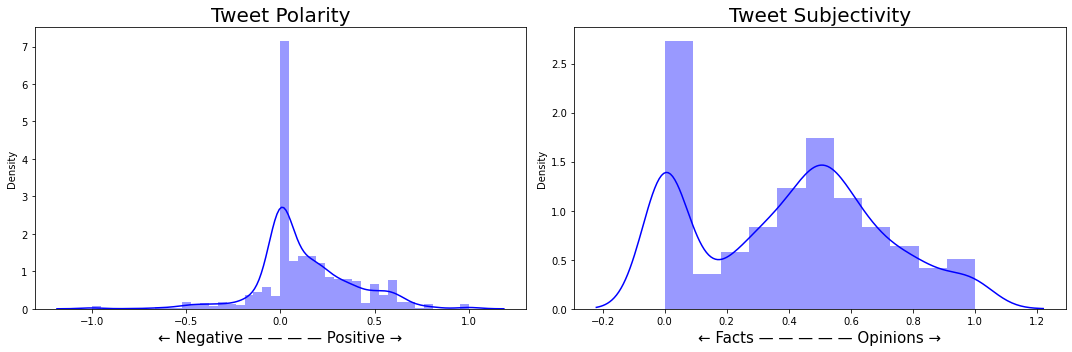

In [16]:
f, axs = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(tweet_polarity, color="b", ax=axs[0])
axs[0].set_title("Tweet Polarity", fontsize = 20)
axs[0].set_xlabel('← Negative — — — — Positive →', fontsize=15)
sns.distplot(tweet_subjectivity, color="b", ax=axs[1])
axs[1].set_title("Tweet Subjectivity", fontsize = 20)
axs[1].set_xlabel('← Facts — — — — — Opinions →', fontsize=15)

plt.tight_layout()